In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler

# To import SVM
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Forestfire

In [2]:
df = pd.read_csv('D:\\Data Science Assignments\\Assignment 17 SVM\\forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
df.duplicated().sum()

8

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<Axes: >

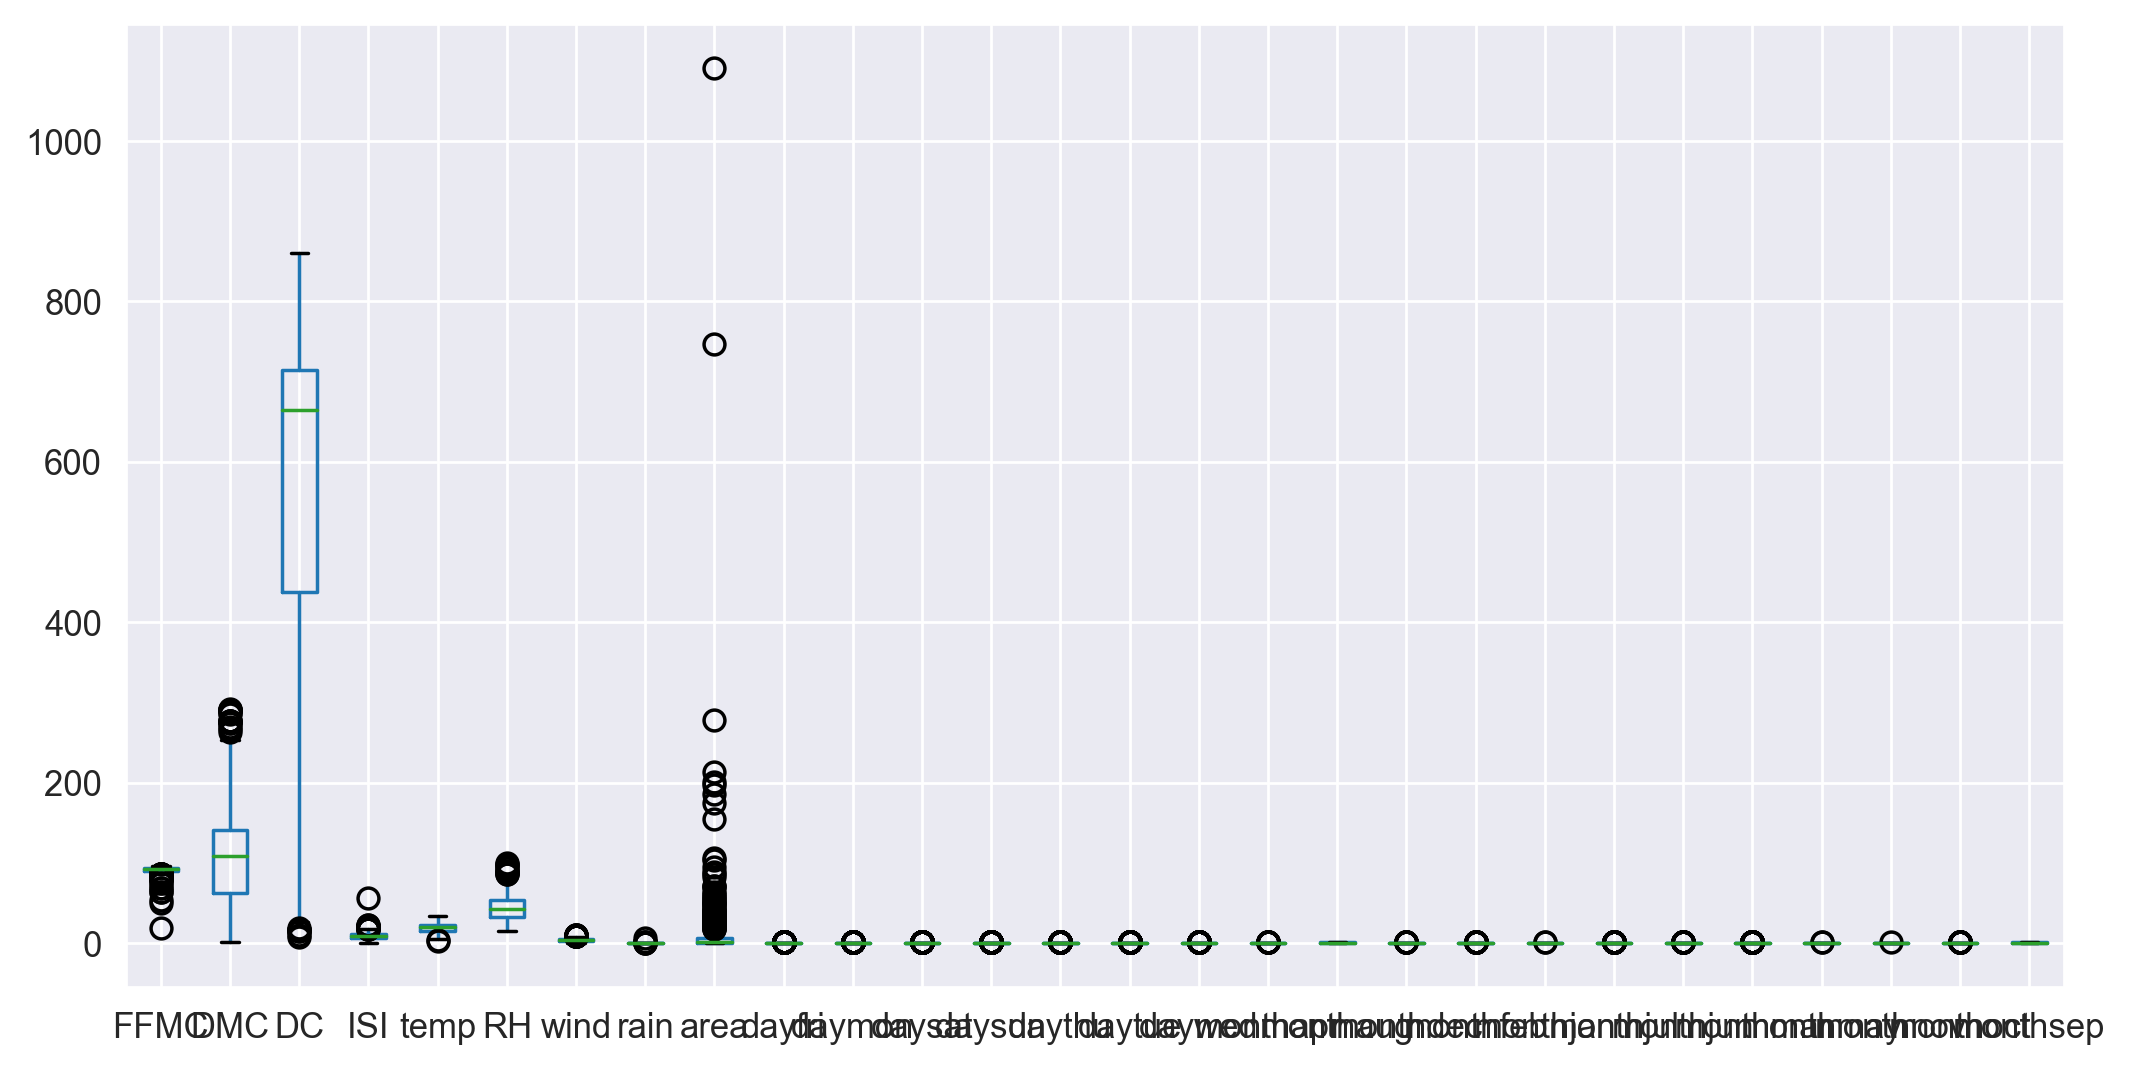

In [10]:
df.boxplot()

In [11]:
df_data = df.select_dtypes(include='number')

In [12]:
def outlier_detection(data, cols):
    
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df_data[col] = np.where(df_data[col] > upper, upper, np.where(df_data[col] < lower, lower,df_data[col]))

In [13]:
outlier_detection(df_data,df_data.columns) 

<Axes: >

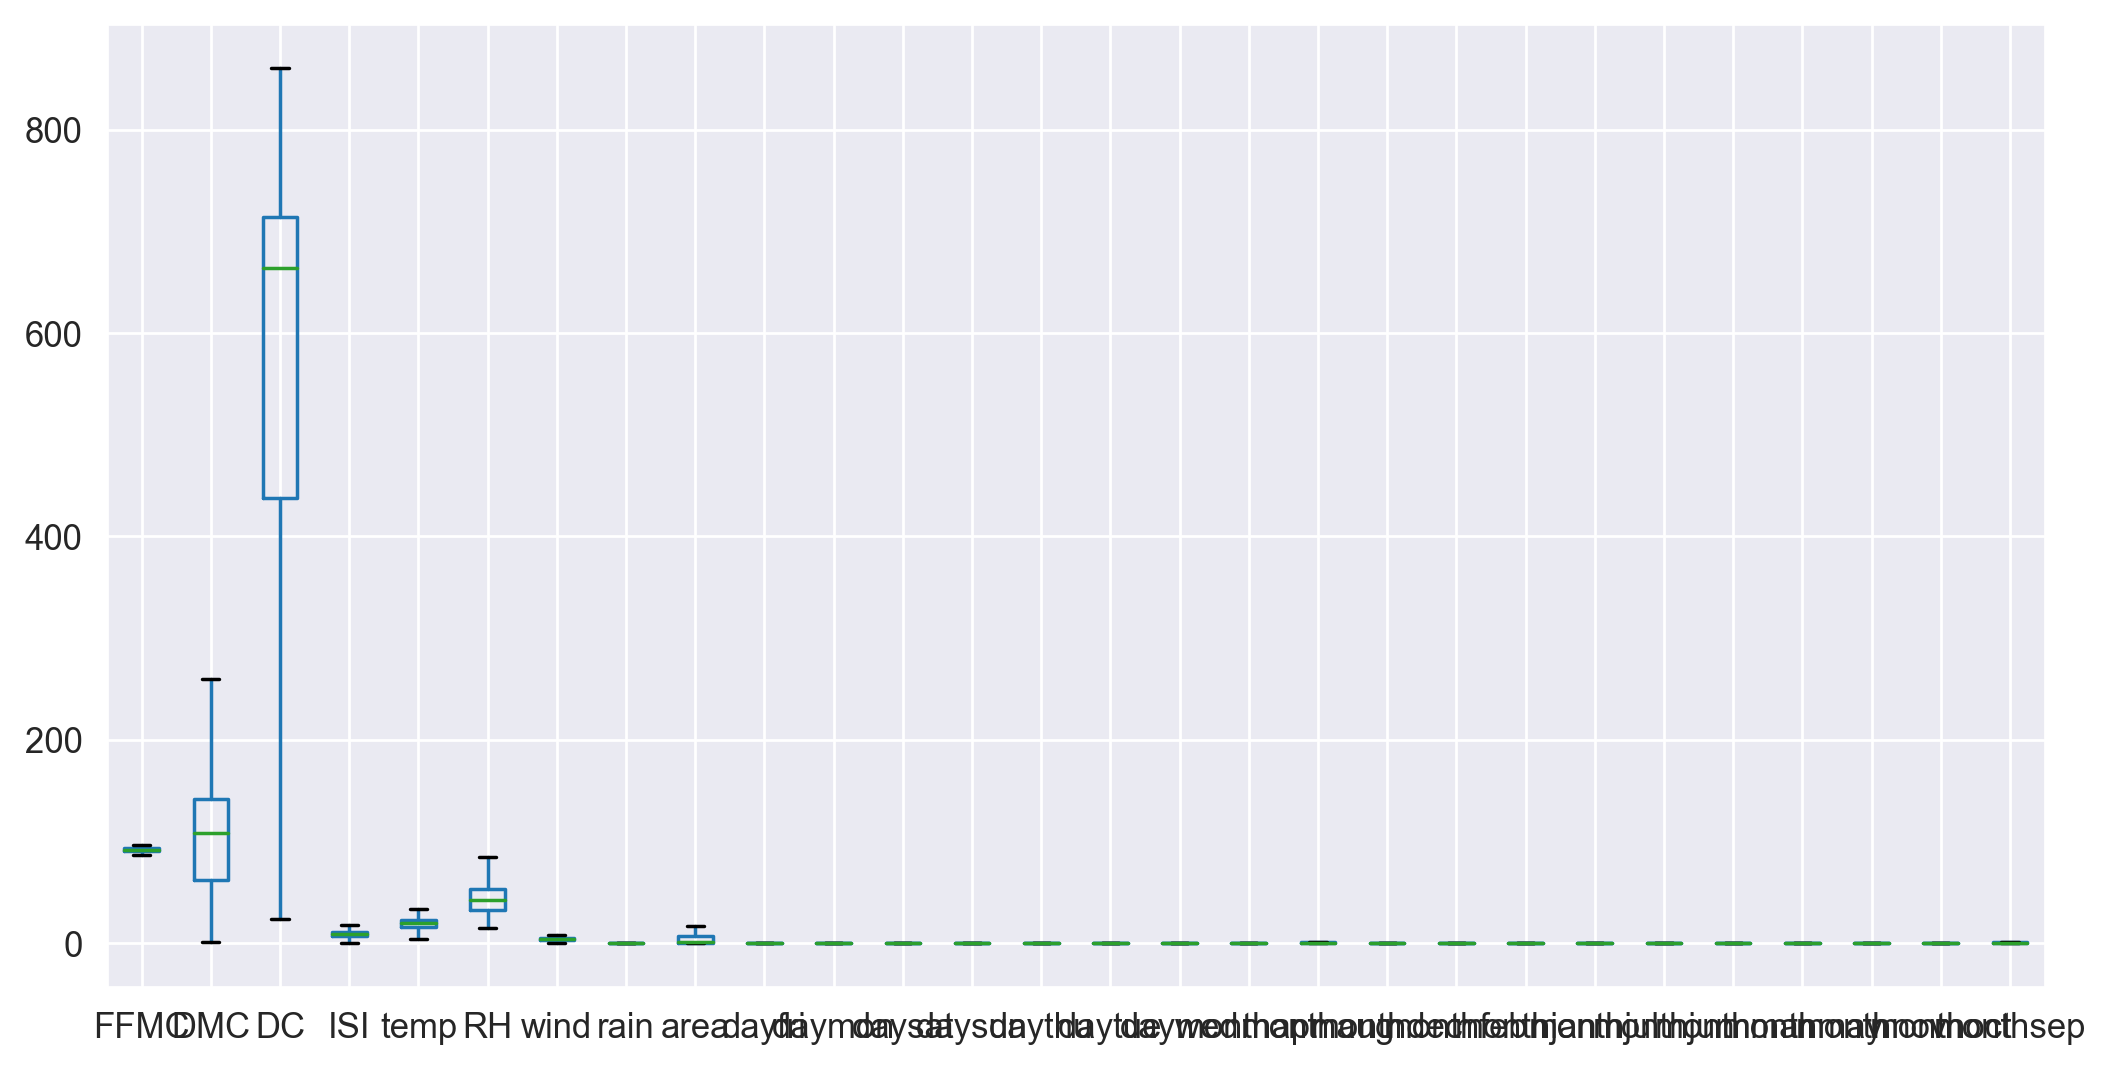

In [14]:
df_data.boxplot()

In [15]:
df.loc[:,'FFMC':'monthsep']

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.loc[:,'FFMC':'monthsep'] = df_data

<Axes: >

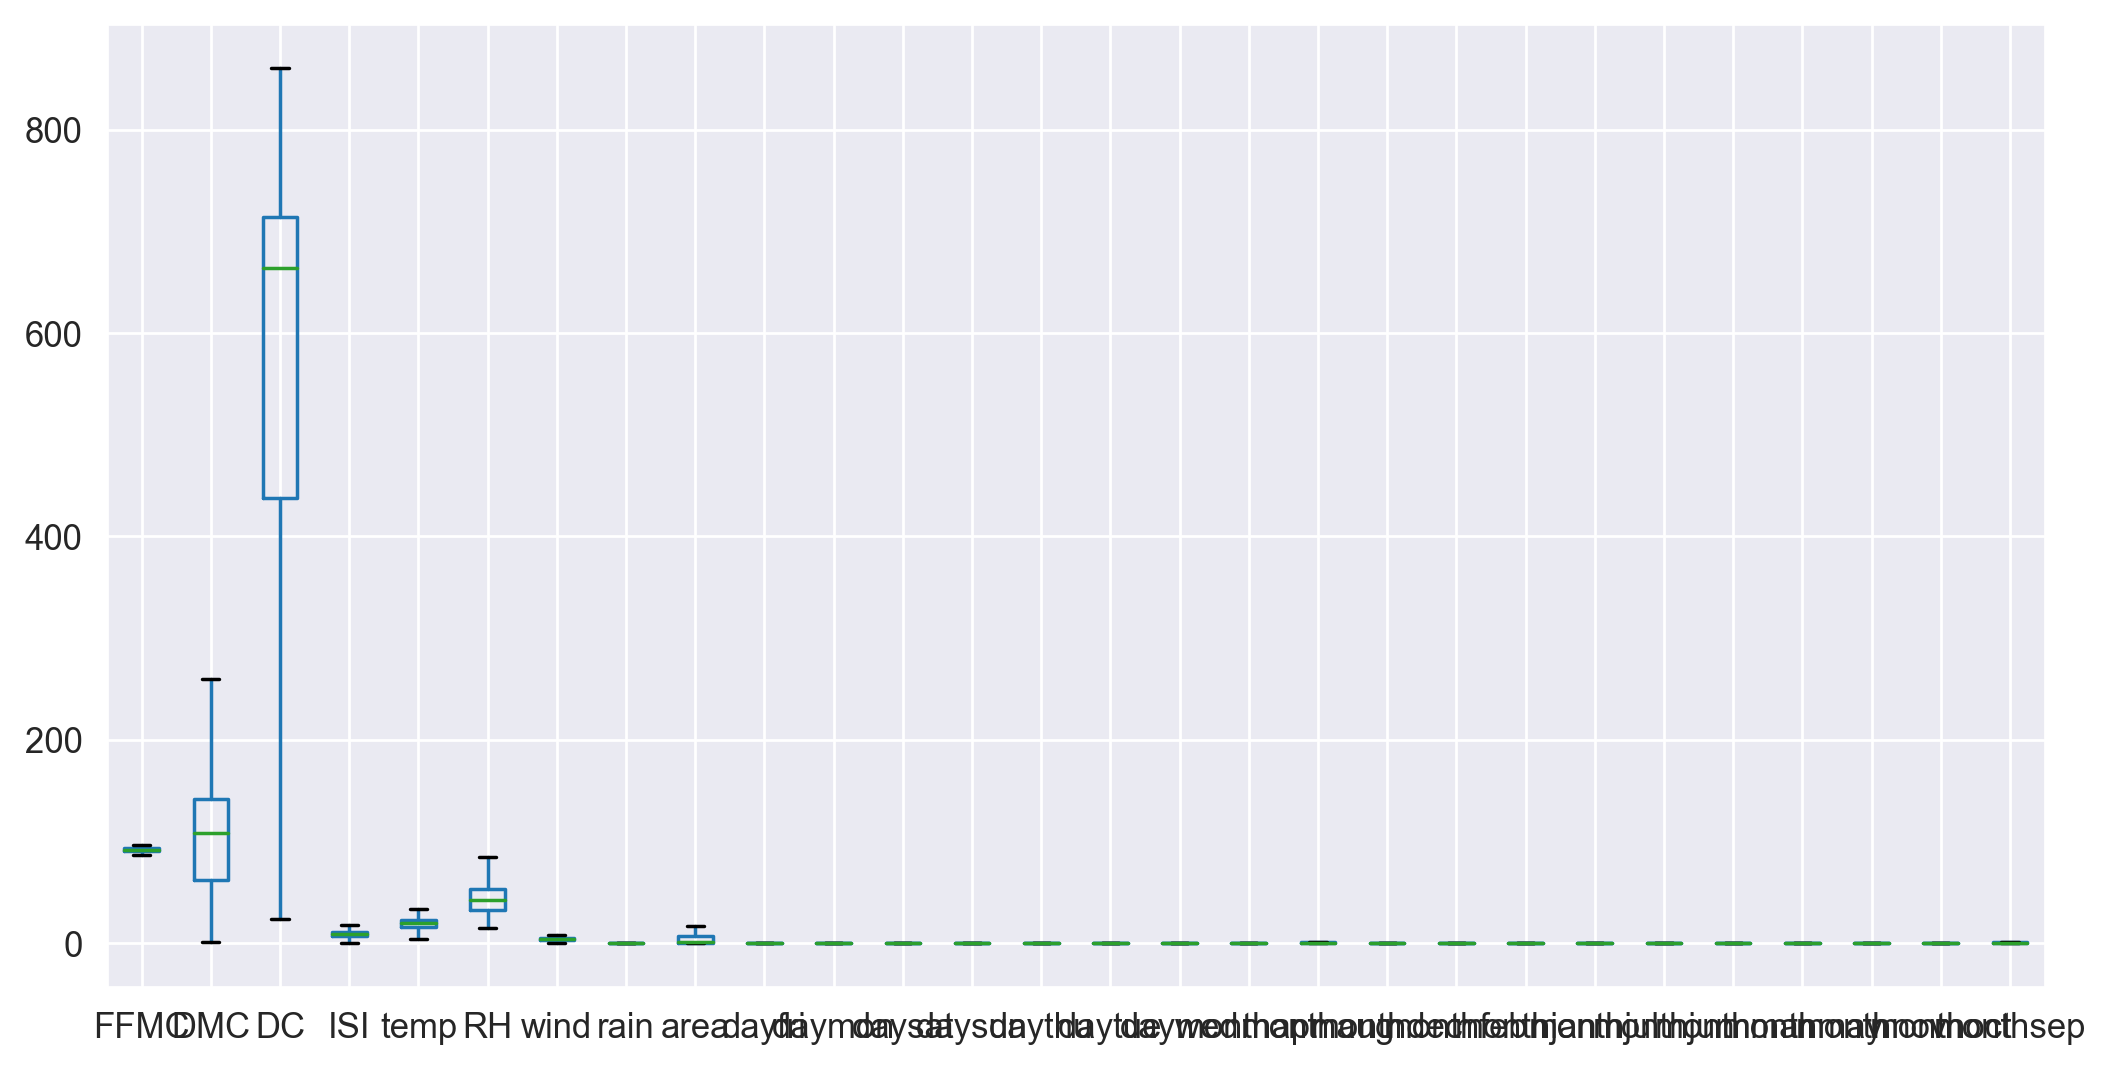

In [17]:
df.boxplot()

In [18]:
df.drop(columns=['month','day'],inplace=True)

In [19]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.20,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90.60,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90.60,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91.70,33.3,77.5,9.0,8.3,84.5,4.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,89.30,51.3,102.2,9.6,11.4,84.5,1.8,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,86.15,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,86.15,56.7,665.6,1.9,21.9,71.0,5.8,0.0,16.45,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,86.15,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,94.40,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 509, dtype: object

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Split the data
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)

# Model building
svc = SVC()

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.7223587223587223
0.7549019607843137


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)
svc = SVC(kernel='rbf')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print('Accuracy of Train data :',svc.score(xtrain,ytrain))
print('Accuracy of Test data :',svc.score(xtest,ytest))

Accuracy of Train data : 0.995085995085995
Accuracy of Test data : 0.9705882352941176


In [26]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [27]:
ypred = lg.predict(xtest)
ypred

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'large', 'large', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'large', 'small', 'small', 'large', 'small', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'large', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'large',
       'small', 'large', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'large', 'large', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'sma

In [28]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       large       1.00      0.92      0.96        25
       small       0.97      1.00      0.99        77

    accuracy                           0.98       102
   macro avg       0.99      0.96      0.97       102
weighted avg       0.98      0.98      0.98       102



# Salary Data

In [29]:
Test = pd.read_csv('D:\\Data Science Assignments\\Assignment 17 SVM\\SalaryData_Test(1).csv')
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [30]:
Test.duplicated().sum()

930

In [31]:
Test.drop_duplicates(inplace=True)

In [32]:
Test.duplicated().sum()

0

In [33]:
Test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for column in categorical_columns:
    Test[column] = label_encoder.fit_transform(Test[column])


In [35]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [36]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14130 non-null  int64 
 1   workclass      14130 non-null  int32 
 2   education      14130 non-null  int32 
 3   educationno    14130 non-null  int64 
 4   maritalstatus  14130 non-null  int32 
 5   occupation     14130 non-null  int32 
 6   relationship   14130 non-null  int32 
 7   race           14130 non-null  int32 
 8   sex            14130 non-null  int32 
 9   capitalgain    14130 non-null  int64 
 10  capitalloss    14130 non-null  int64 
 11  hoursperweek   14130 non-null  int64 
 12  native         14130 non-null  int32 
 13  Salary         14130 non-null  object
dtypes: int32(8), int64(5), object(1)
memory usage: 1.2+ MB


<Axes: >

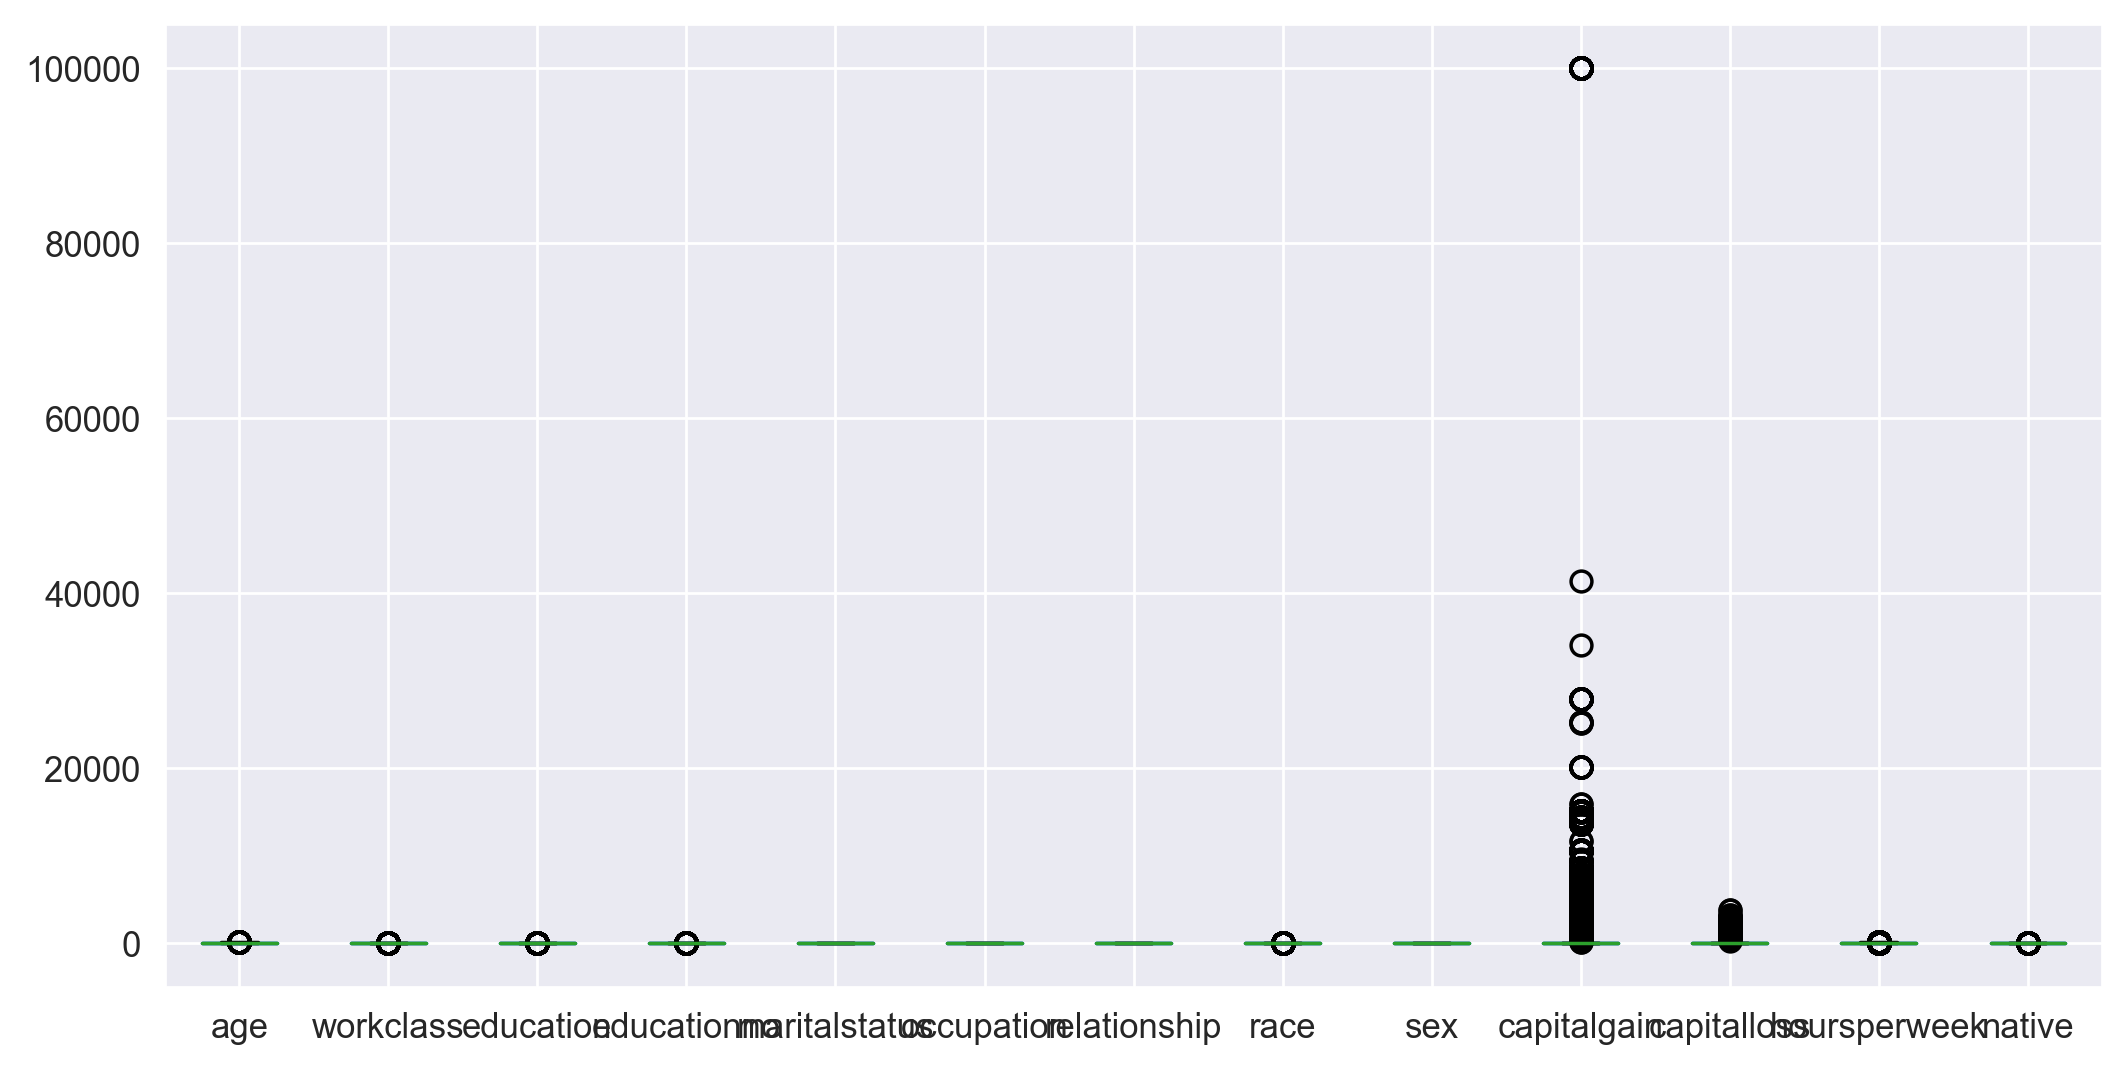

In [37]:
Test.boxplot()

In [38]:
xtest = Test.iloc[:,:-1]
ytest = Test.iloc[:,-1]

In [39]:
def outlier_detection(data, cols):
    
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower,data[col]))

In [40]:
outlier_detection(xtest,xtest.columns) 

<Axes: >

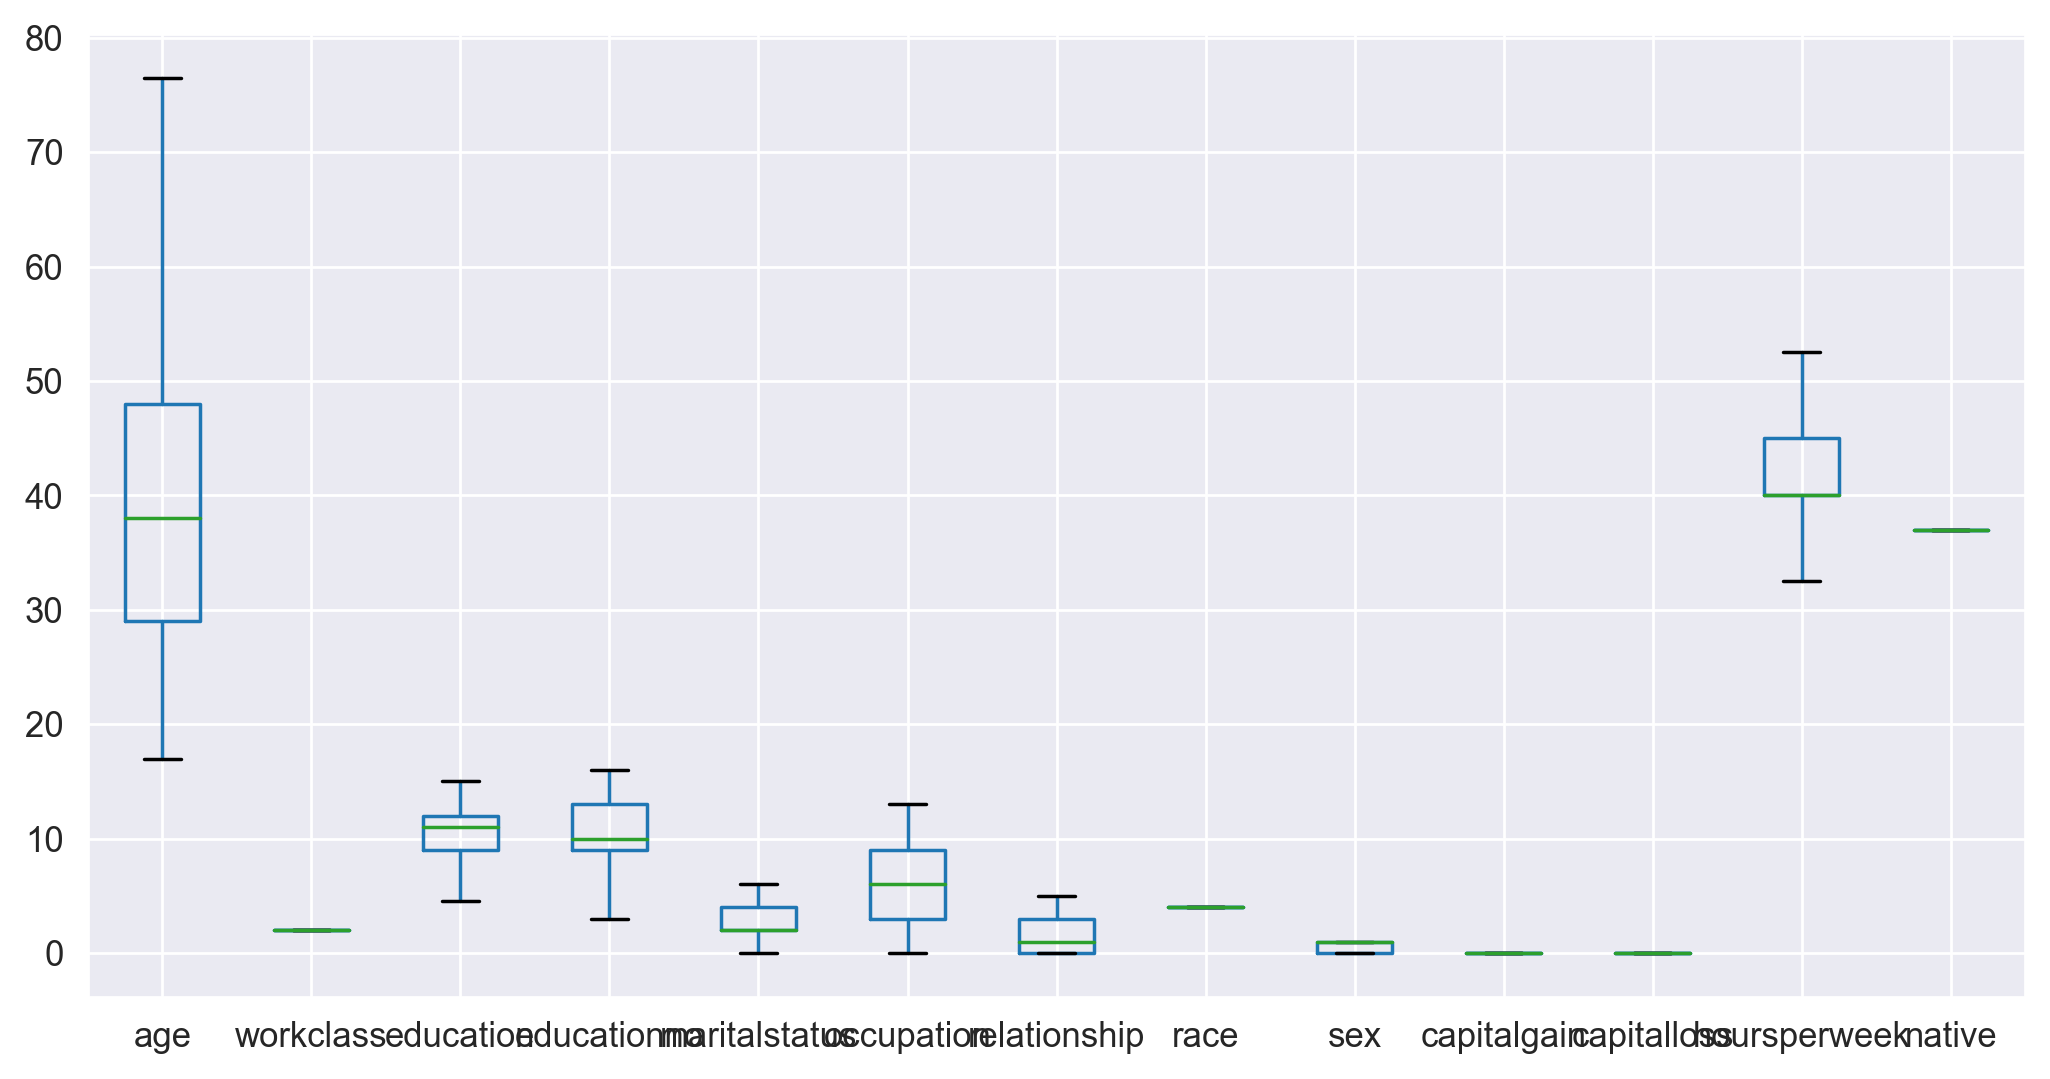

In [41]:
xtest.boxplot()

In [42]:
Train = pd.read_csv('D:\\Data Science Assignments\\Assignment 17 SVM\\SalaryData_Train(1).csv')
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [43]:
Train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [44]:
Train.duplicated().sum()

3258

In [45]:
Train.drop_duplicates(inplace=True)

In [46]:
Train.duplicated().sum()

0

In [47]:
Train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for column in categorical_columns:
    Train[column] = label_encoder.fit_transform(Train[column])


In [49]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,>50K
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,<=50K
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K


In [50]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            26903 non-null  int64 
 1   workclass      26903 non-null  int32 
 2   education      26903 non-null  int32 
 3   educationno    26903 non-null  int64 
 4   maritalstatus  26903 non-null  int32 
 5   occupation     26903 non-null  int32 
 6   relationship   26903 non-null  int32 
 7   race           26903 non-null  int32 
 8   sex            26903 non-null  int32 
 9   capitalgain    26903 non-null  int64 
 10  capitalloss    26903 non-null  int64 
 11  hoursperweek   26903 non-null  int64 
 12  native         26903 non-null  int32 
 13  Salary         26903 non-null  object
dtypes: int32(8), int64(5), object(1)
memory usage: 2.3+ MB


In [51]:
xtrain = Train.iloc[:,:-1]
ytrain = Train.iloc[:,-1]

In [52]:
def outlier_detection(data, cols):
    
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower,data[col]))

In [53]:
outlier_detection(xtrain,xtrain.columns)

<Axes: >

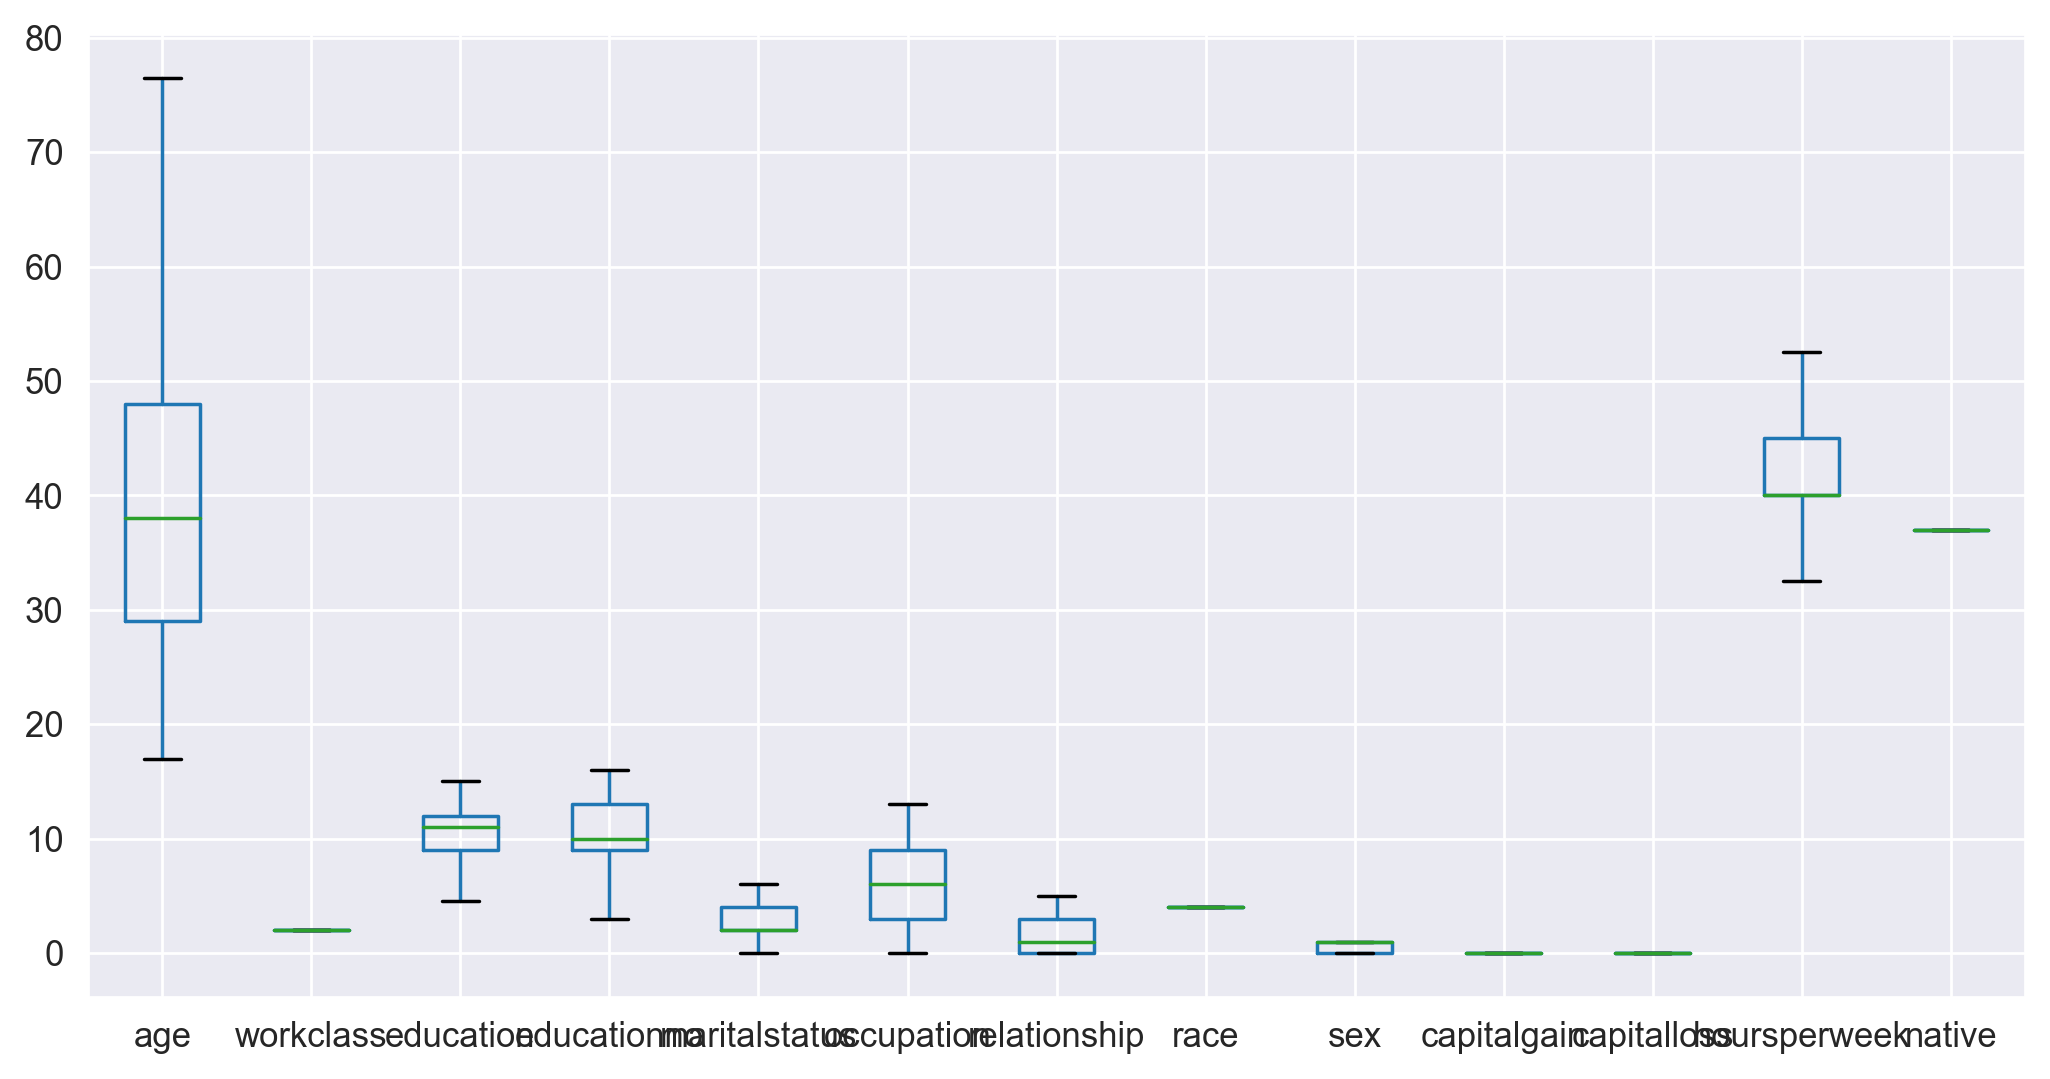

In [54]:
xtrain.boxplot()

In [55]:
xtrain,ytrain,xtest,ytest

(        age  workclass  education  educationno  maritalstatus  occupation  \
 0      39.0        2.0        9.0         13.0            4.0         0.0   
 1      50.0        2.0        9.0         13.0            2.0         3.0   
 2      38.0        2.0       11.0          9.0            0.0         5.0   
 3      53.0        2.0        4.5          7.0            2.0         5.0   
 4      28.0        2.0        9.0         13.0            2.0         9.0   
 ...     ...        ...        ...          ...            ...         ...   
 30154  53.0        2.0       12.0         14.0            2.0         3.0   
 30155  22.0        2.0       15.0         10.0            4.0        10.0   
 30156  27.0        2.0        7.0         12.0            2.0        12.0   
 30158  58.0        2.0       11.0          9.0            6.0         0.0   
 30160  52.0        2.0       11.0          9.0            2.0         3.0   
 
        relationship  race  sex  capitalgain  capitalloss  hou

In [56]:
# Model building
svc = SVC(kernel='rbf')

#standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [57]:
svc.fit(xtrain,ytrain)

SVC()

In [58]:
ypred = svc.predict(xtest)

In [59]:
print('Accuracy of Train data :',svc.score(xtrain,ytrain))
print('Accuracy of Test data :',svc.score(xtest,ytest))

0.8189049548377504
0.8193205944798302


In [60]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [61]:
ypred = lg.predict(xtest)
ypred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype=object)

In [62]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       <=50K       0.82      0.92      0.87     10620
        >50K       0.63      0.40      0.49      3510

    accuracy                           0.79     14130
   macro avg       0.73      0.66      0.68     14130
weighted avg       0.78      0.79      0.78     14130

